In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
os.chdir('/Users/jessesnaust/Documents/python scripts/')

## load data

In [5]:
df_wing = pd.read_csv('Fly stuff/wing_size_normalized.csv', index_col=False)
df_wing.head()

,variants,normalized_mean,stdev,num_replicates
0,4A,3.739984,0.278252,10
1,C124S,-0.440364,-0.034346,10
2,D22E,-0.804356,-0.073384,9
3,P38H,-0.199249,-0.013897,9
4,L70V,0.039773,0.002589,8


In [6]:
df_var = pd.read_csv('Fly stuff/PTEN_vars_summary_updated.csv', index_col=False)
df_var.head()

,variants,ClinVAR,ClinVar significance,ClinVar Condition,Cosmic,Cosmic incidence,Cosmic - primary tissue type,Cosmic -histology,gnomAD,gnomAD - Allele frequency,...,same amino acid to disease info (from ClinVar/COSMIC/gnomAD),Additional comments,Wing Assay function calls,Post_expt_function calls,HEK pAKT/AKT data (Post et al),Yeast (Post et al),Yeast (Mighell et al),function_calls,Additional comments on function calls,Eclosion Assay
0,D268E,Yes,Likely Benign,Hereditary cancer-predisposing syndrome,Yes,3*,Thyroid,Carcinoma,Yes,137.0,...,COSMIC - D268Y 2*,NaN,Like WT,Benign,WT,WT,0.225343,Benign,Additionally ClinVar says it is likely benign....,Partial LOF
1,I203V,Yes,VUS,Hereditary cancer-predisposing syndrome|PTEN h...,Yes,1*,Thyroid,Carcinoma,No,NaN,...,NaN,NaN,Like WT,Benign,WT,WT,0.449992,Benign,WT in Drosophila eclosion as well,WT
2,I400V,Yes,VUS,PTEN hamartoma tumor syndrome,No,NaN,NaN,NaN,No,NaN,...,NaN,NaN,Like WT,Benign,WT,WT,-0.338630,Benign,pLOF in Drosophila eclosion,Partial LOF
3,N117S,Yes,VUS,Hereditary cancer-predisposing syndrome|not pr...,Yes,1*,Lung,Carcinoma,Yes,2.0,...,ClinVar - N117H - VUS N117H in gnomAD,NaN,Like WT,Benign,WT,WT,0.240901,Benign,GOF in Drosophila eclosion,GOF
4,N262S,No,NaN,NaN,No,NaN,NaN,NaN,Yes,1.0,...,COSMIC - N262I 1*,NaN,Like WT,Benign,WT,WT,-0.208005,Benign,pLOF in Drosophila eclosion,Partial LOF


## scatterplot

In [7]:
# sort dataframe according to fc_code and by wing_mean_normalized
df_wing_sorted = df_wing.sort_values(by=['normalized_mean']).reset_index(drop=True)
df_wing_sorted.head(10)

,variants,normalized_mean,stdev,num_replicates
0,D22E,-0.804356,-0.073384,9
1,G127R,-0.482834,-0.036107,8
2,C124S,-0.440364,-0.034346,10
3,R130Q,-0.407882,-0.028380,7
4,F241S,-0.392750,-0.028349,10
5,H93R,-0.359511,-0.027831,9
6,Y68N,-0.320319,-0.031615,10
7,N276S,-0.314472,-0.022544,8
8,A34D,-0.307810,-0.020746,8
9,H123Y,-0.295581,-0.021910,10


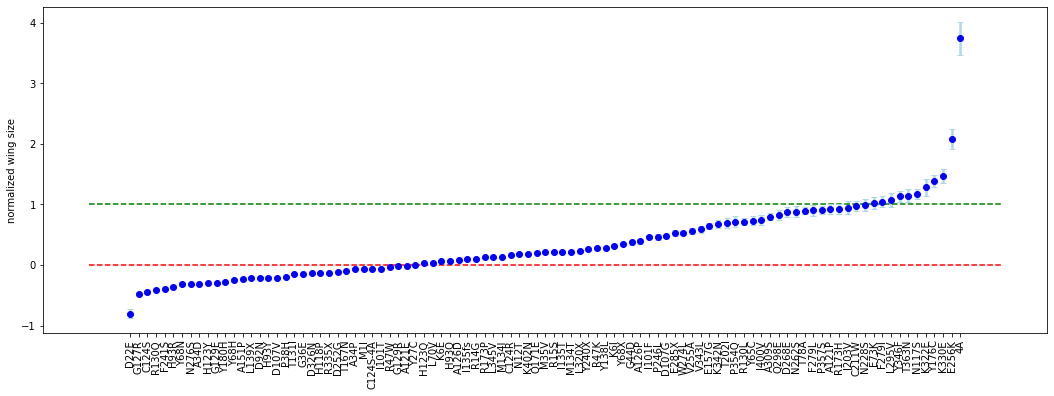

In [65]:
# plot using matplotlib.pyplot
x = df_wing_sorted.index
y = df_wing_sorted['normalized_mean']
x_labels = df_wing_sorted['variants']
err = df_wing_sorted['stdev']

fig = plt.figure(figsize=(18, 6))
plt.errorbar(x, y, yerr=err, xerr=None, fmt='ob',
             ecolor='lightblue', elinewidth=2.5, capsize=3.0)
xmin, xmax = plt.xlim()
plt.hlines(0, xmin, xmax, colors='red', linestyles='dashed')
plt.hlines(1, xmin, xmax, colors='green', linestyles='dashed')
# formatting arguments
plt.xticks(ticks=x, labels=x_labels, rotation=90)
plt.ylabel('normalized wing size')

plt.show()


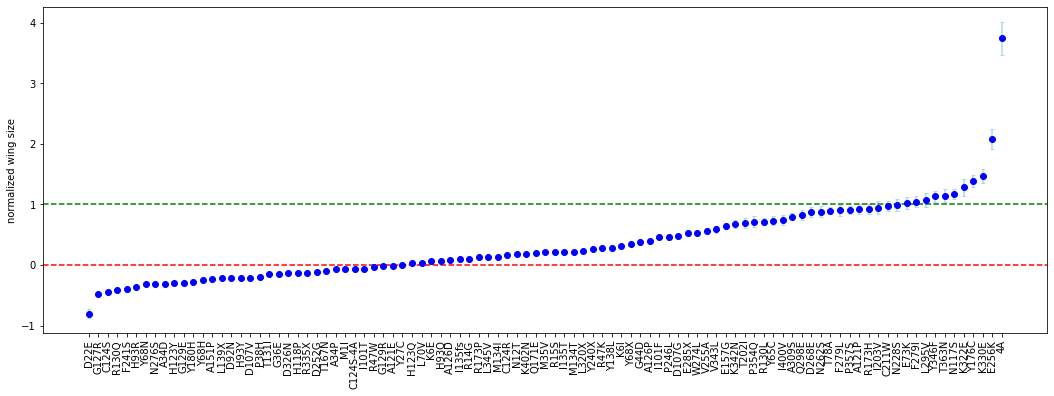

In [66]:
# plot using matplotlib.axes.Axes
x = df_wing_sorted.index
y = df_wing_sorted['normalized_mean']
err = df_wing_sorted['stdev']
fig, ax = plt.subplots(1, 1, figsize=(18,6))
ax.errorbar(x, y, xerr=None, yerr=err, fmt='ob', ecolor='lightblue', capsize=2.0)
ax.axhline(y = 0, linestyle='--', c='r')
ax.axhline(y = 1, linestyle='--', c='g')
ax.set_xticks(x)
ax.set_xticklabels(df_wing_sorted['variants'].to_list(), rotation=90)
ax.set_ylabel('normalized wing size')

# save fig
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Fly stuff/wing_scatterplot_normalized_sorted.pdf', transparent=True)

plt.show()

## classified scatterplot

In [75]:
# merge in function calls
df_class = df_wing.merge(df_var[['variants', 'function_calls']], how='left', on='variants')
df_class.head()

,variants,normalized_mean,stdev,num_replicates,function_calls
0,4A,3.739984,0.278252,10,biochemical
1,C124S,-0.440364,-0.034346,10,biochemical
2,D22E,-0.804356,-0.073384,9,NaN
3,P38H,-0.199249,-0.013897,9,NaN
4,L70V,0.039773,0.002589,8,NaN


In [76]:
# make a dictionary to map categorical
d = {'Pathogenic':0,'Benign':1,'biochemical':2,'NaN':3}
print(d)

{'Pathogenic': 0, 'Benign': 1, 'biochemical': 2, 'NaN': 3}


In [77]:
# convert NaN in "function_calls" to string
df_class['function_calls'].fillna('NaN', inplace=True)

# convert "function_calls" to categorical to allow encoding
df_class['function_calls'] = df_class['function_calls'].astype('category')

# perform categorical encoding
df_class['fc_code'] = df_class['function_calls'].map(d)

df_class.head()

,variants,normalized_mean,stdev,num_replicates,function_calls,fc_code
0,4A,3.739984,0.278252,10,biochemical,2
1,C124S,-0.440364,-0.034346,10,biochemical,2
2,D22E,-0.804356,-0.073384,9,NaN,3
3,P38H,-0.199249,-0.013897,9,NaN,3
4,L70V,0.039773,0.002589,8,NaN,3


In [78]:
# check data types
df_class.dtypes

variants             object
normalized_mean     float64
stdev               float64
num_replicates        int64
function_calls     category
fc_code            category
dtype: object

In [79]:
# change the dtype of fc_code from 'category' to 'int'
# so it can be sorted
df_class['fc_code'] = df_class['fc_code'].astype('int64')

In [80]:
# sort dataframe according to fc_code then by mean
df_class_sorted = df_class.sort_values(by=['fc_code', 'normalized_mean'])
df_class_sorted = df_class_sorted.reset_index(drop=True)

df_class_sorted.head()

,variants,normalized_mean,stdev,num_replicates,function_calls,fc_code
0,R130Q,-0.407882,-0.028380,7,Pathogenic,0
1,H123Y,-0.295581,-0.021910,10,Pathogenic,0
2,Y68H,-0.254862,-0.026123,10,Pathogenic,0
3,D107V,-0.209826,-0.015396,7,Pathogenic,0
4,T131I,-0.154321,-0.011719,10,Pathogenic,0


In [90]:
# inspect variants at thresholds
vars = ['P246L', 'R130L', 'I400V']
for v in vars:
    print(df_class_sorted[df_class_sorted['variants']==v])

   variants  normalized_mean     stdev  num_replicates function_calls  fc_code
12    P246L         0.462501  0.054069               9     Pathogenic        0
   variants  normalized_mean     stdev  num_replicates function_calls  fc_code
13    R130L         0.714415  0.059732              10     Pathogenic        0
   variants  normalized_mean     stdev  num_replicates function_calls  fc_code
14    I400V         0.742121  0.080273              10         Benign        1


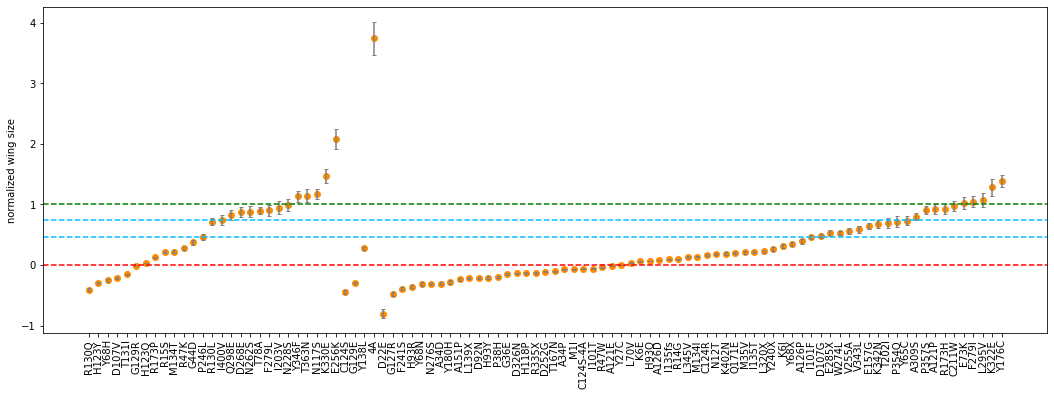

In [91]:
# plot using matplotlib.axes.Axes
x = df_class_sorted.index
y = df_class_sorted['normalized_mean']
err = df_class_sorted['stdev']

fig, ax = plt.subplots(1, 1, figsize=(18,6))
ax.scatter(x, y, c='darkorange', marker='o')
ax.errorbar(x, y, xerr=None, yerr=err, fmt='none', ecolor='grey', capsize=2.0)

ax.axhline(y=0, linestyle='--', c='r')
ax.axhline(y=1, linestyle='--', c='g')
ax.axhline(y=0.462501, linestyle='--', c='deepskyblue')
ax.axhline(y=0.742121, linestyle='--', c='deepskyblue')

ax.set_xticks(x)
ax.set_xticklabels(df_class_sorted['variants'].to_list(), rotation=90)
ax.set_ylabel('normalized wing size')

# save fig
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Fly stuff/wing_scatterplot_classified.pdf', transparent=True)

plt.show()